In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data into the pandas environment and identify some basic details of the dataset.


In [26]:
#Loading the file from a csv
input_data=pd.read_csv('employee.csv')
#first few rows
input_data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [27]:
# Checking shape of the dataset
input_data.shape

(9, 7)

The dataset has 9 rows and 7 columns

In [28]:
# Checking basic information
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


# 2. Reset the index as "name" as the index.

In [29]:
input_data = pd.read_csv("employee.csv", index_col = 'name') 

In [30]:
input_data.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [31]:
x = input_data.loc[['Jack Morgan', 'Josh Wills']]

In [32]:
x

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [33]:
input_data[input_data.department.isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score

In [34]:
performance_score = input_data[input_data['performance_score'] > 700]

In [35]:
performance_score

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [36]:
per_score1 = input_data[(input_data['performance_score'] > 500) & (input_data['performance_score']  < 700)]

In [37]:
per_score1

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [38]:
# Checking for null values
input_data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [39]:
# Checking data types
input_data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

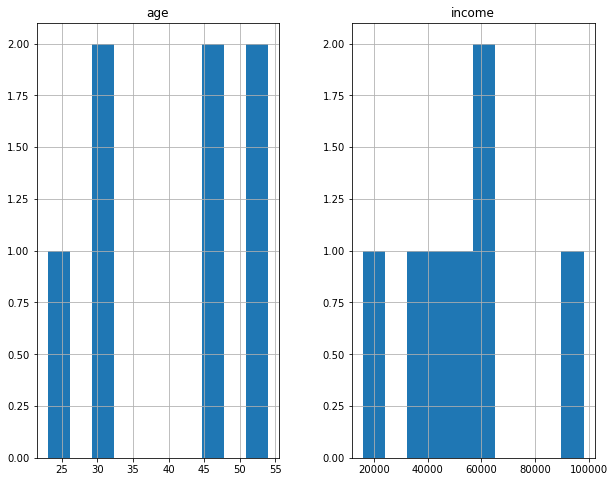

In [40]:
# Plotting graph
frequency_graph=input_data.select_dtypes(include=['float'])
frequency_graph.hist(figsize=(10,8))
plt.show()

In [41]:
# Filling missing values in 'age' column with median
input_data['age']=input_data['age'].fillna(input_data['age'].median())

In [42]:
input_data.isna().sum()

age                  0
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [43]:
# Filling the missing values in income with median
input_data['income']=input_data['income'].fillna(input_data['income'].median())

In [44]:
# Filling the missing values in gender with mode
input_data['gender'].mode()

0    F
dtype: object

In [45]:
input_data['gender']=input_data['gender'].fillna('F')

In [46]:
input_data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

Now there are no missing values in the dataset

# 8. Check the outliers and handle outliers in performance score using Percentiles.

Text(0.5, 1.0, 'Boxplot of performance_score')

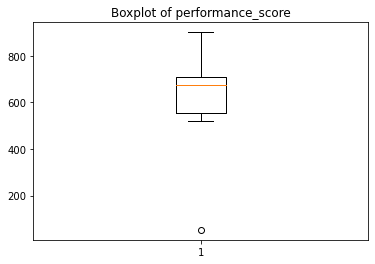

In [47]:
#Ploting the performance score  to check the outliers
plt.boxplot(input_data['performance_score'])
plt.title('Boxplot of performance_score')

In [48]:
# There is an outlier in the given dataset

In [49]:
# Finding percentiles 
Q1 = np.percentile(input_data['performance_score'],25, interpolation = 'midpoint')
Q2 = np.percentile(input_data['performance_score'],50, interpolation = 'midpoint')
Q3 = np.percentile(input_data['performance_score'],75, interpolation = 'midpoint')

In [50]:
# Calculating inter quartile range and finding upper limit and lower limits
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upp_limit = Q3+1.5*IQR
print(low_limit)
print(upp_limit)

323.5
943.5


In [52]:
# Finding outliers
outlier = []
for x in input_data['performance_score']:
    if ((x < low_limit) or (x > upp_limit)):
        outlier.append(x)
print(outlier)

[53]


In [53]:
# finding the index values of outlier
ind1 = input_data['performance_score'] < low_limit
ind1

name
Allen Smith      False
S Kumar          False
Jack Morgan      False
Ying Chin        False
Dheeraj Patel    False
Satyam Sharma    False
James Authur      True
Josh Wills       False
Leo Duck         False
Name: performance_score, dtype: bool

In [54]:
# Dropping outliers
input_data =input_data.drop('James Authur', axis =0)
input_data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


Text(0.5, 1.0, 'Boxplot of performance_score')

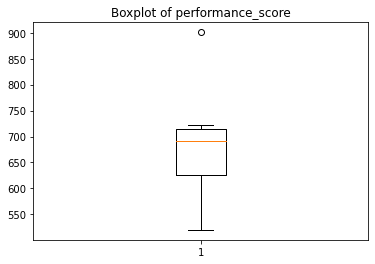

In [55]:
#Ploting the performance score service to check the outliers
plt.boxplot(input_data['performance_score'])
plt.title('Boxplot of performance_score')

In [56]:
# The outliers are now reduced.

# 9. Check the gender column and do Dummy encoding.

In [57]:
#Encoding
#Gender is a categorial value so ML cannot take it into account
#One hot encoding
input_data.gender.nunique()

2

In [58]:
input_data=pd.get_dummies(input_data)
input_data

,age,income,performance_score,gender_F,gender_M,department_Finance,department_Operations,department_Sales,grade_G0,grade_G2,grade_G3,grade_G4
name,,,,,,,,,,,,
Allen Smith,45.0,52000.0,723,1,0,0,1,0,0,0,1,0
S Kumar,45.0,16000.0,520,1,0,1,0,0,1,0,0,0
Jack Morgan,32.0,35000.0,674,0,1,1,0,0,0,1,0,0
Ying Chin,45.0,65000.0,556,1,0,0,0,1,0,0,1,0
Dheeraj Patel,30.0,42000.0,711,1,0,0,1,0,0,1,0,0
Satyam Sharma,45.0,62000.0,649,1,0,0,0,1,0,0,1,0
Josh Wills,54.0,52000.0,901,1,0,1,0,0,0,0,1,0
Leo Duck,23.0,98000.0,709,0,1,0,0,1,0,0,0,1


# 10.Do the standard scaling on the feature performance score

In [64]:
x = input_data['performance_score']

In [69]:
x = pd.DataFrame(x)

In [70]:
# Checking datatype of x
type(x)

pandas.core.frame.DataFrame

In [71]:
#Scaling
from sklearn import preprocessing

In [72]:
standardisation = preprocessing.StandardScaler()
x= standardisation.fit_transform(x)

In [74]:
x

,0
0,0.392262
1,-1.475872
2,-0.058667
3,-1.144578
4,0.281831
5,-0.288733
6,2.030331
7,0.263425
